# **STAT 200 Project (120 points)**

#### **Dylan Watson**


---

<br>

For your project, you must analyze data from the [COPDGene study](http://www.copdgene.org/) using the concepts covered in this course. Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (5 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font> (5 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `dat2`. How many rows does `dat2` contain? Answer in a complete sentence.


In [1]:
install.packages("GGally")
library(dplyr)
library(ggplot2)
library(GGally)

Installing package into 'C:/Users/dylan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dylan\AppData\Local\Temp\Rtmp210qtX\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# 1.)
# Retrieve data from url & view num rows.
url = "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv"
data = read.csv(url)
nrow(data)

# 2.)
# Omit rows with na types & view num rows.
dat1 = na.omit(data)
nrow(dat1)

# 3.)
# View num rows where FEV1_phase2 is NA & view num rows.
dat2 = data |>
  filter(is.na(FEV1_phase2))
nrow(dat2)

# Personal Data Exploration.
summary(dat1)
head(dat1)
unique(dat1$hay_fever)
dim(data)

[1] 5747

[1] 4000

[1] 1747

     sid              visit_year    visit_date          visit_age    
 Length:4000        Min.   :2008   Length:4000        Min.   :39.00  
 Class :character   1st Qu.:2009   Class :character   1st Qu.:52.50  
 Mode  :character   Median :2009   Mode  :character   Median :59.40  
                    Mean   :2009                      Mean   :59.67  
                    3rd Qu.:2010                      3rd Qu.:66.12  
                    Max.   :2011                      Max.   :85.00  
    gender              race             height_cm       weight_kg     
 Length:4000        Length:4000        Min.   :140.0   Min.   : 34.90  
 Class :character   Class :character   1st Qu.:162.6   1st Qu.: 70.00  
 Mode  :character   Mode  :character   Median :170.0   Median : 82.30  
                                       Mean   :169.9   Mean   : 84.07  
                                       3rd Qu.:177.0   3rd Qu.: 95.30  
                                       Max.   :208.3   Max.   :166.80  
     s

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924
7,10025W,2008,2/15/2008,68.9,Male,Black or African American,168.9,51.0,120,60,⋯,6.4421,51.156200,-1.0000,-1.00000,-906.021,-1.000,0.27,0.718,2.697,0.596


[1] 0 1 3

[1] 5747   35

The df dat1 contains 4000 rows of data. The df dat2 contains 1747 rows.

<br>

---

<br>






####<font color=red>Task 2</font> (10 points)

1. From `dat1`, plot the histogram of `FEV1`
2. Calculate the percentage of `FEV1` values within one standard deviation of its mean. Answer in a complete sentence.
3. Calculate the percentage of `FEV1` values within 2 standard deviations of its mean. Answer in a complete sentence.
4. Use your answers from 2.1-2.3 to determine if the FEV1 variable is approximately normally distributed.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 67.575
[1] 96.75


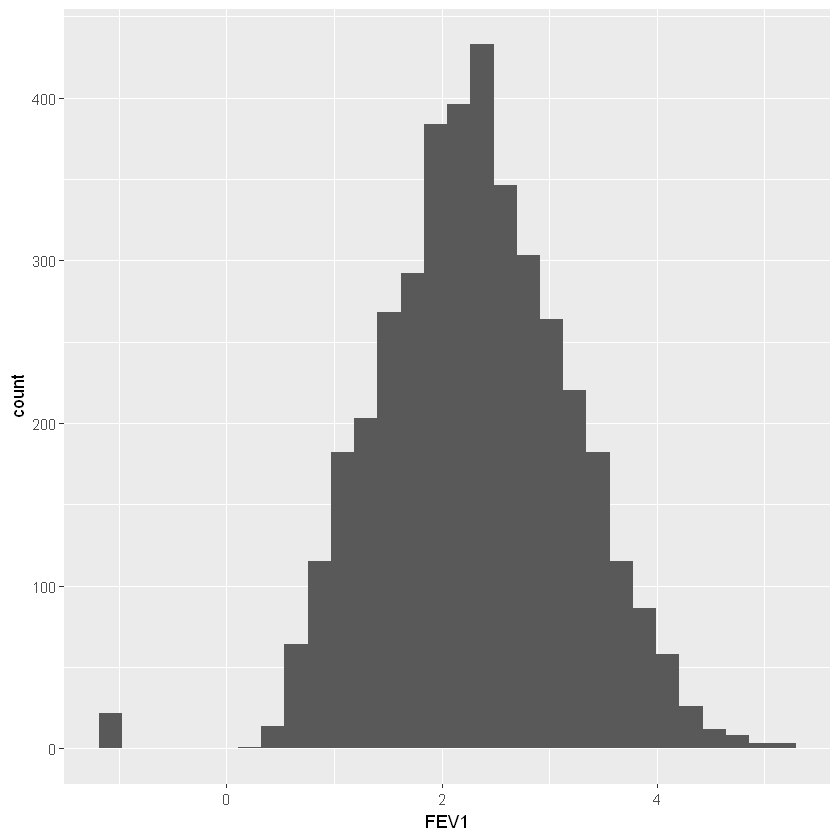

In [3]:
# 1.)
# Plot hist of FEV1.
ggplot(data = dat1, mapping = aes(x = FEV1)) +
  geom_histogram()

# 2.)
# Calc mean & sd of FEV1.
FEV1_mean = mean(dat1$FEV1)
FEV1_sd = sd(dat1$FEV1)
# Find rows within 1 sd.
sigma_1 = dat1 |>
  filter(FEV1 > (FEV1_mean - FEV1_sd) & FEV1 < (FEV1_mean + FEV1_sd))
# Calc percent.
within_1sd = nrow(sigma_1) / nrow(dat1) * 100
print(within_1sd)

# 3.)
# Find rows within 2 sd.
sigma_2 = dat1 |>
  filter(FEV1 > (FEV1_mean - 2* FEV1_sd) & FEV1 < (FEV1_mean + 2* FEV1_sd))
# Calc percent.
within_2sd = nrow(sigma_2) / nrow(dat1) * 100
print(within_2sd)

4.) We found that 67.575% of FEV1 values fell within one standard deviation of the mean and 96.75% of values within two standard deviations of the mean. This agrees with the empirical rule of standard normal distributions which states that 68% and 95% of data should fall within 1 and 2 standard deviations respectively. In addition, the histogram of FEV1 also appears approximately normal. So we can say that the variable FEV1 is approximately normal.

<br>

---

<br>






####<font color=red>Task 3</font> (10 points)

1. From `dat1`, find two other numeric variables and plot their histograms.
2. Describe the histogram of the FIRST variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph
2. Describe the histogram of the SECOND variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 2.120261
[1] 0.8262204
[1] 0.295
[1] 5.147


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


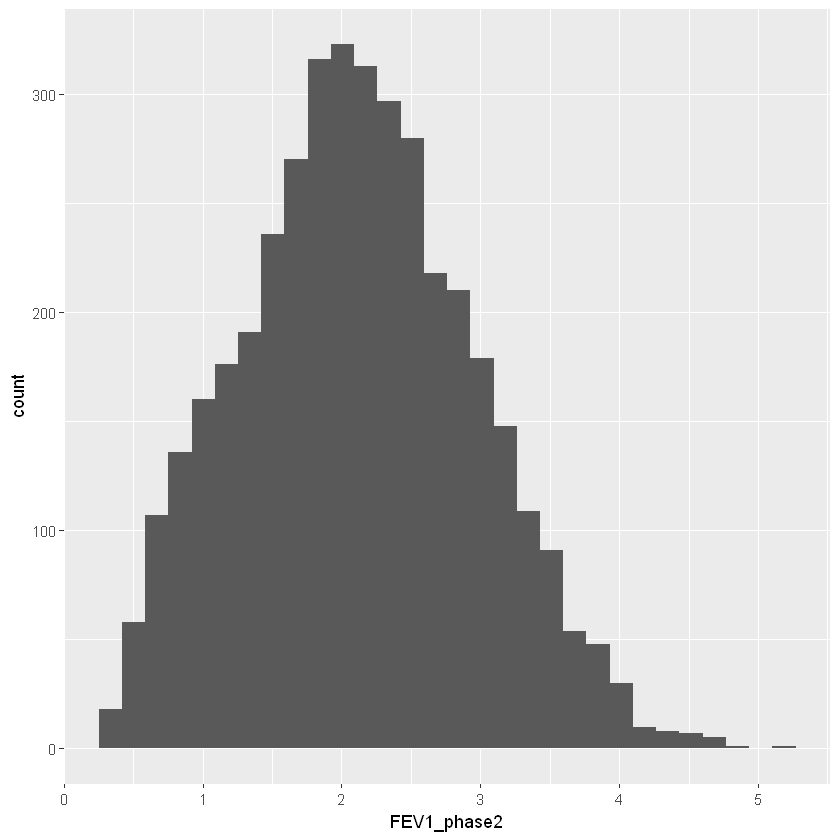

[1] 0.68047
[1] 0.1871808
[1] -1
[1] 1


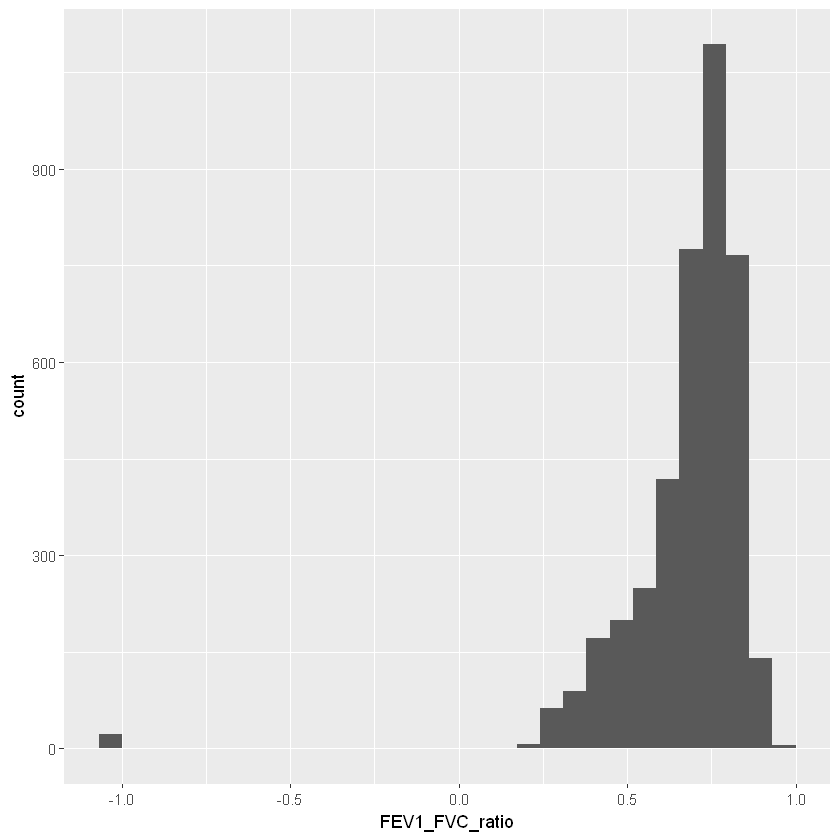

In [4]:
# 1.)
# Plot hist of FEV1_phase2.
ggplot(data = dat1, mapping = aes(x = FEV1_phase2)) +
  geom_histogram()
# Desc. Statistics.
FEV1_phase2_mean = mean(dat1$FEV1_phase2)
print(FEV1_phase2_mean)
FEV1_phase2_sd = sd(dat1$FEV1_phase2)
print(FEV1_phase2_sd)
FEV1_phase2_min = min(dat1$FEV1_phase2)
print(FEV1_phase2_min)
FEV1_phase2_max = max(dat1$FEV1_phase2)
print(FEV1_phase2_max)

# Plot hist of FEV1_FVC_ratio.
ggplot(data = dat1, mapping = aes(x = FEV1_FVC_ratio)) +
  geom_histogram()
# Desc. Statistics.
FEV1_FVC_ratio_mean = mean(dat1$FEV1_FVC_ratio)
print(FEV1_FVC_ratio_mean)
FEV1_FVC_ratio_sd = sd(dat1$FEV1_FVC_ratio)
print(FEV1_FVC_ratio_sd)
FEV1_FVC_ratio_min = min(dat1$FEV1_FVC_ratio)
print(FEV1_FVC_ratio_min)
FEV1_FVC_ratio_max = max(dat1$FEV1_FVC_ratio)
print(FEV1_FVC_ratio_max)

2.) The first numeric variable I chose to plot is FEV1_phase2 which is the FEV1 test at followup. It appears to be approximately normally distributed with a mean of 2.120 and sd of 0.826. The min value is 0.295 and max of 5.147 giving a range of 4.852. No skew.


3.) The second numeric variable I chose to plot is FEV1_FVC_ratio. This distribution is not normally distributed and appears to have a left skew. It has a mean of 0.680 and sd if 0.187. The min value is -1.0 and max is 1.0. There does appear to be a set of outliers at -1.0.


<br>

---

<br>






####<font color=red>Task 4</font> (10 points)

1. Using `dat1`, create a boxplot to visualize the relationship between `FEV1_phase2` and `smoking_status`.
2. Based on the boxplot, which group tends to have better breathing capacity?
3. Select rows in `dat1` corresponding to a `smoking_status` of `Current smoker` or `Former smoker`. Create a 95% confidence interval to determine if average FEV1 for phase 2 is different between current or former smokers. Explain your answer in complete sentences.

[1] 2.144413 2.214513
attr(,"conf.level")
[1] 0.95

[1] 2.009210 2.084078
attr(,"conf.level")
[1] 0.95

[1] 0.08155305 0.18408473
attr(,"conf.level")
[1] 0.95

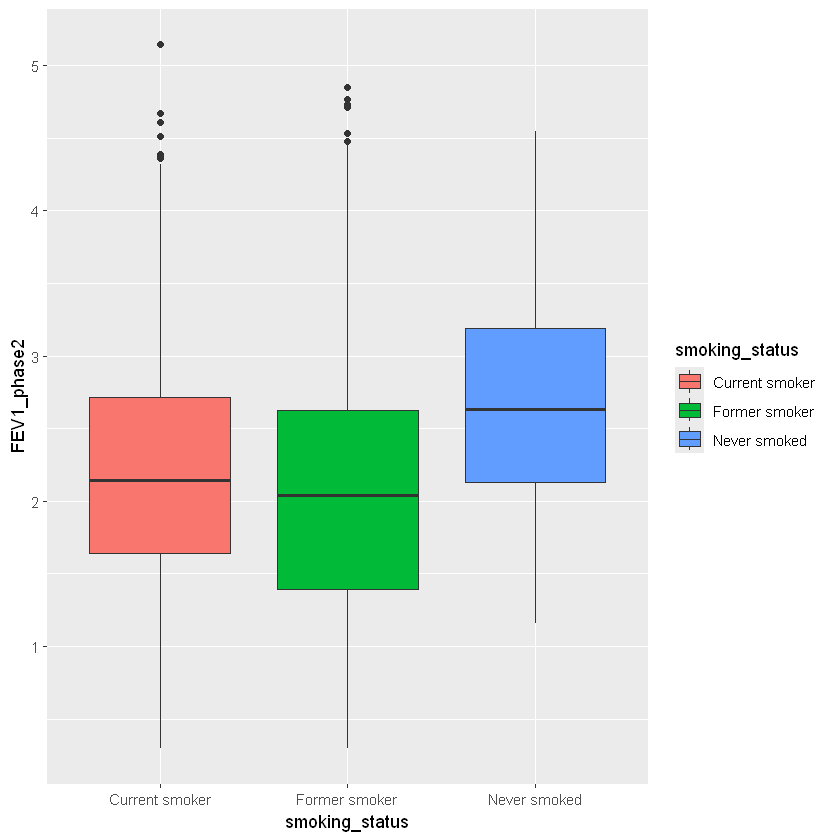

In [5]:
# 1.)
# Boxplot of FEV1_phase2 by smoking_status.
ggplot(data = dat1, mapping = aes(y = FEV1_phase2, x = smoking_status, fill = smoking_status)) +
  geom_boxplot()

# 3.)
# Filter by smoking_status and create conf ints of FEV1_phase2 at levels.
dat1_Current_smoker = dat1 |>
  filter(smoking_status == "Current smoker")

t.test(dat1_Current_smoker$FEV1_phase2)$conf.int

dat1_Former_smoker = dat1 |>
  filter(smoking_status == "Former smoker")

t.test(dat1_Former_smoker$FEV1_phase2)$conf.int

t.test(dat1_Current_smoker$FEV1_phase2, dat1_Former_smoker$FEV1_phase2)$conf.int

2.) Using the boxplot to analyze the numeric variable FEV1_phase2 at the varying smoking_status levels we find that individuals who never smoked have the greatest breathing capacity followed significantly behind by both Current smokers and lastly Former smokers. Interestingly former smoker had a lower capacity than current smokers. While one may assume that former smokers lungs could heal and result in higher capacity than current smokers, its likely that formers smokers have smoked for many years and damaged their lungs beyond recovery while current smokers may have recently attained the habit.

3.) I created 3 confidence intervals, one for each mean and one for a difference in means. For current smokers, we are 95% confident that the interval (2.14, 2.21) captures the true population mean FEV1_phase2. For former smokers, we are 95% confident that the interval (2.01, 2.08) captures the true population mean FEV1_phase2. The confidence interval for the difference in means provides us (0.08, 0.18). This interval does not contain the value 0 and indicates that there is a statistically significant difference in means that the alpha=0.05 level for FEV1_phase2 between current and former smokers.

<br>

---

<br>






####<font color=red>Task 5</font> (10 points)

1. Using `dat1`, create two more boxplots to visualize the relationship between `FEV1_phase2` and two other categorical variables.
2. For the first variable, use a 95% confidence interval to determine if the average `FEV1_phase2` is different between two categories.
3. For the second variable, use a 95% confidence interval to determine if the average `FEV1_phase2` in phase 2 is different between two categories.

[1] 0.5976740 0.6918855
attr(,"conf.level")
[1] 0.95

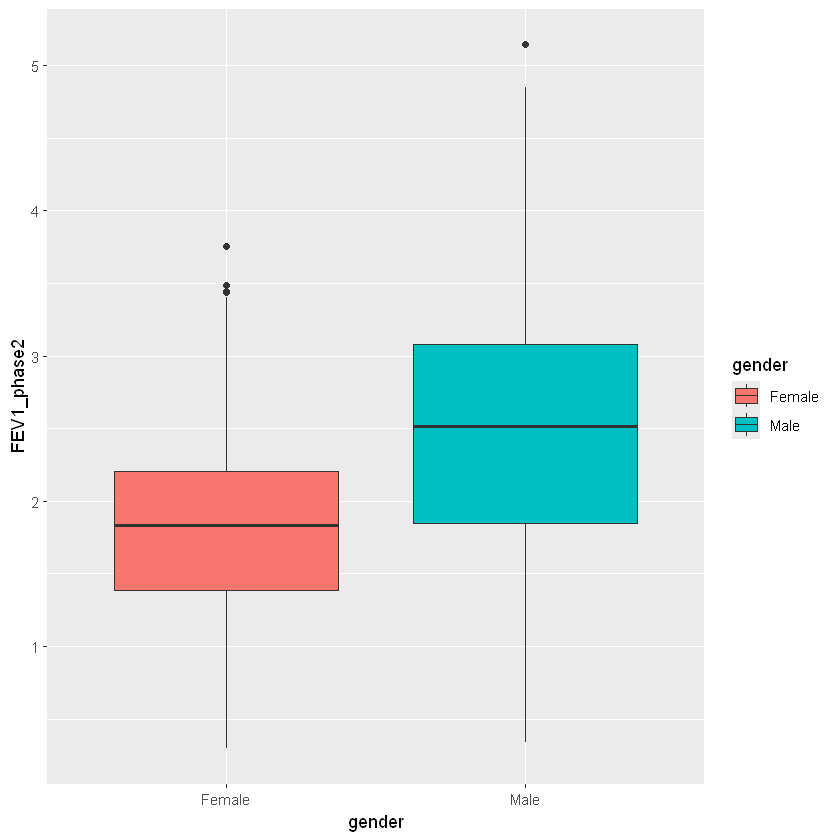

[1] 0.01728048 0.12506982
attr(,"conf.level")
[1] 0.95

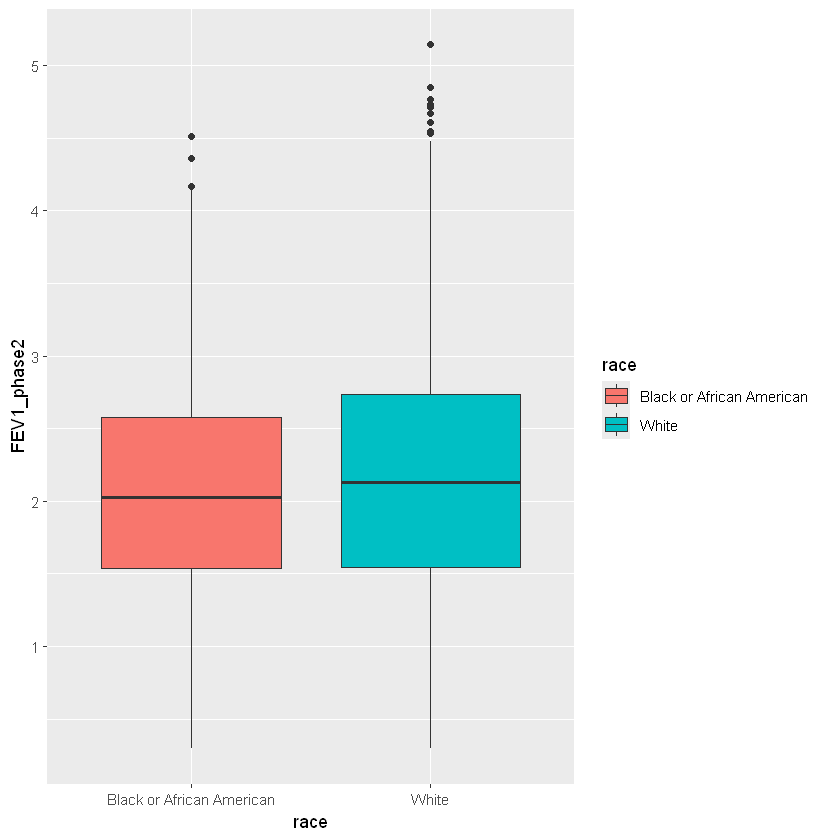

In [6]:
# 1.)
# Boxplot of FEV1_phase2 by gender.
ggplot(data = dat1, mapping = aes(y = FEV1_phase2, x = gender, fill = gender)) +
  geom_boxplot()
# T test Conf int diff of means.
t.test(dat1[dat1$gender == "Male", ]$FEV1_phase2, dat1[dat1$gender == "Female", ]$FEV1_phase2)$conf.int

# Boxplot of FEV1_phase2 by race.
ggplot(data = dat1, mapping = aes(y = FEV1_phase2, x = race, fill = race)) +
  geom_boxplot()
# T test Conf int diff of means.
t.test(dat1[dat1$race == "White", ]$FEV1_phase2, dat1[dat1$race == "Black or African American", ]$FEV1_phase2)$conf.int

2.) The t test 95% confidence interval for difference of means of FEV1_phase2 between male and female was (0.598, 0.692). This interval does not contain zero and indicates that there is statistical significant difference in means of FEV1_phase2 by gender.


3.) The t test 95% confidence interval for difference of means of FEV1_phase2 between white and black or african americans was (0.017, 0.125). This interval does not contain zero and indicates that there is statistical significant difference in means of FEV1_phase2 by race.

<br>

---

<br>






####<font color=red>Task 6</font> (20 points)

1. Using `dat1`, create a scatterplot visualizing the relationship between `FEV1_phase2` (y-axis) and `FEV1` (x-axis). Note that values that are -1 are missing observations. You may ignore this for this class.
2. What relationship do you observe based on the scatterplot?
3. Fit a simple linear regression model by regressing `FEV1_phase2` (Y) on `FEV1` (X). Summarize the regression.
4. Describe the $R^2$ of the regression in the context of its definition.
5. What is the slope and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
6. What is the intercept and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
7. Use a 95% confidence interval to determine if the slope is significantly less than 1. Explain what this means in terms of breathing health of the patients.


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


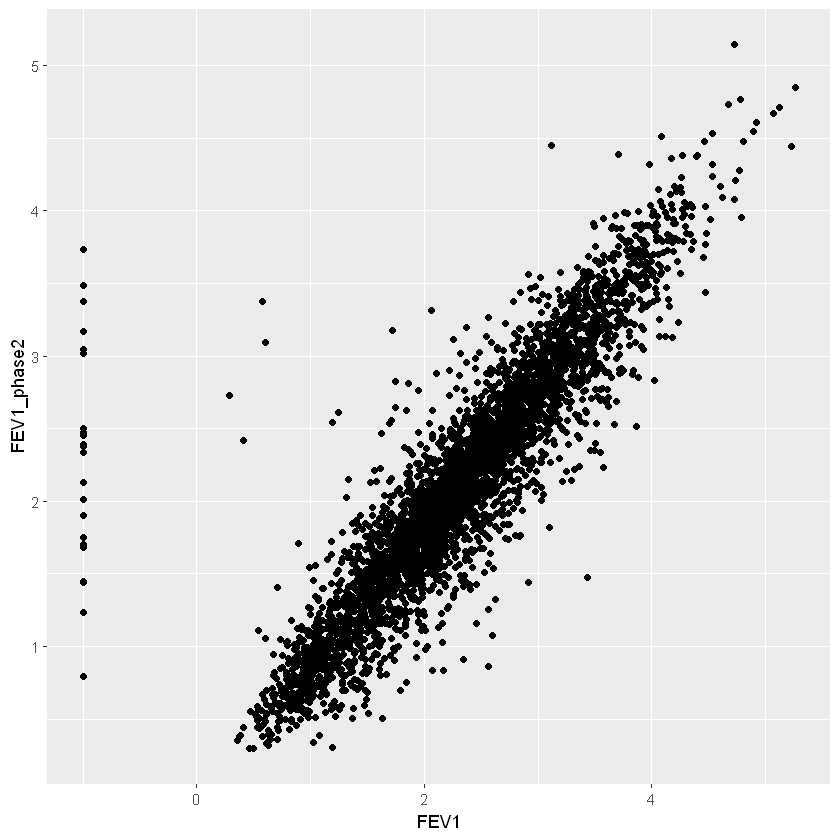

In [7]:
# 1.)
# Scatter of FEV1_phase2 vs FEV1
ggplot(data = dat1, mapping = aes(y = FEV1_phase2, x = FEV1)) +
  geom_point()

# 3.)
model_1 = lm(FEV1_phase2 ~ FEV1, dat1)
summary(model_1)

# 7.)
confint(model_1)

2.) There is a strong positive linear relationship between FEV1_phase2 and FEV1.

3.) The intercept b0 = 0.178 and slope b1 = 0.840. This means that for each 1 unit increase in FEV1 there is a 0.840 increase in FEV1_phase2. The R^2 is 0.7897 indicating a strong positive linear correlation.

4.) The coefficient of determination R^2 = 0.7897. Approximately 78.97% of the variance in FEV1_phase2 can be accounted for by FEV1.

5.) The slope b1 = 0.840. This means that for each 1 unit increase in FEV1 there is a 0.840 increase in FEV1_phase2.

6.) The intercept b0 = 0.178, meaning that if FEV1 is 0, then FEV1_phase2 is 0.178.

7.) The 95% confidence interval for slope is (0.827, 0.854). This interval does not contain the value 0 which indicates that there is a statistically significant positive correlation between FEV1 and FEV1_phase2. In other words, an individuals 1 second expiratory volume is strongly indicative of their 1 second expiratory volume five years later.

<br>

---

<br>






####<font color=red>Task 7</font> (10 points)

1. Identify two other variables in `dat1` that you think would be related to breathing health, as measured by `FEV1_phase2`. Plot these variables using scatterplots (`FEV1_phase2` on Y axis, variable 1 or variable 2 on X axis). What do you observe? Explain in complete sentences.
2. Include these two variables (categorical or numeric), along with `FEV1`, in your regression from Task 6. Show the regression summary. Keep `FEV1_phase2` as Y.
3. Using 95% confidence intervals, are the slopes for the two variables you selected significantly different from 0? Explain and interpret in complete sentences.


In [8]:
# Some Data Munging and EDA prior to task 7.
# Remove non-relevant cols.
dat1_subset = dat1 |>
  select(-c(sid, visit_year, visit_date))

# Encode Categorical Cols for cor() function and other that dont accept factors.
yesnounknwon_cols = c("asthma", "bronchitis_attack", "pneumonia", "chronic_bronchitis", "emphysema", "copd", "sleep_apnea")
yesnounknown_encoding = c("Yes" = 1, "No" = 0, "unknown" = 0.5)
gender_encoding = c("Male" = 1, "Female" = 0)
race_encoding = c("White" = 1, "Black or African American" = 0)
smoking_status_encoding = c("Never smoked" = 1, "Current smoker" = 0.5, "Former smoker" = 0)

# Encode Yes No Unknown Cols.
dat1_subset_encoded <- dat1_subset |>
  mutate(across(all_of(yesnounknwon_cols), ~yesnounknown_encoding[.]))
# Encode Hay_Fever Col.
dat1_subset_encoded$hay_fever <- ifelse(dat1_subset_encoded$hay_fever == 1, 1,
                                     ifelse(dat1_subset_encoded$hay_fever == 0, 0,
                                            ifelse(dat1_subset_encoded$hay_fever == 3, 0.5, NA)))
# Encode Gender Col.
dat1_subset_encoded$gender = gender_encoding[dat1_subset_encoded$gender]
# Encode Race Col.
dat1_subset_encoded$race = race_encoding[dat1_subset_encoded$race]
# Encode Smoking_Status_Col.
dat1_subset_encoded$smoking_status = smoking_status_encoding[dat1_subset_encoded$smoking_status]

# Check Encodings.
head(dat1_subset[, c(2:3, 11:18, 22)])
head(dat1_subset_encoded[, c(2:3, 11:18, 22)])

correlations = cor(dat1_subset_encoded)
FEV1_phase2_cors = correlations[, "FEV1_phase2"]
data.frame(FEV1_phase2_cors)

,gender,race,asthma,hay_fever,bronchitis_attack,pneumonia,chronic_bronchitis,emphysema,copd,sleep_apnea,smoking_status
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,White,No,0,No,No,No,No,No,No,Current smoker
3,Female,White,No,0,unknown,Yes,Yes,No,Yes,No,Current smoker
4,Male,White,Yes,1,unknown,Yes,unknown,unknown,Yes,Yes,Former smoker
5,Male,White,unknown,0,Yes,Yes,No,Yes,Yes,No,Former smoker
6,Female,White,No,3,unknown,Yes,unknown,Yes,Yes,No,Former smoker
7,Male,Black or African American,No,0,No,No,No,Yes,Yes,No,Former smoker


,gender,race,asthma,hay_fever,bronchitis_attack,pneumonia,chronic_bronchitis,emphysema,copd,sleep_apnea,smoking_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0.0,0.0,0.0,0,0.0,0.0,0,0,0.5
3,0,1,0.0,0.0,0.5,1,1.0,0.0,1,0,0.5
4,1,1,1.0,1.0,0.5,1,0.5,0.5,1,1,0.0
5,1,1,0.5,0.0,1.0,1,0.0,1.0,1,0,0.0
6,0,1,0.0,0.5,0.5,1,0.5,1.0,1,0,0.0
7,1,0,0.0,0.0,0.0,0,0.0,1.0,1,0,0.0


,FEV1_phase2_cors
,<dbl>
visit_age,-0.311407468
gender,0.390244037
race,0.039703355
height_cm,0.467260928
weight_kg,0.192563466
sysBP,-0.023800127
diasBP,0.109013369
hr,-0.140985100
O2_hours_day,-0.276774995


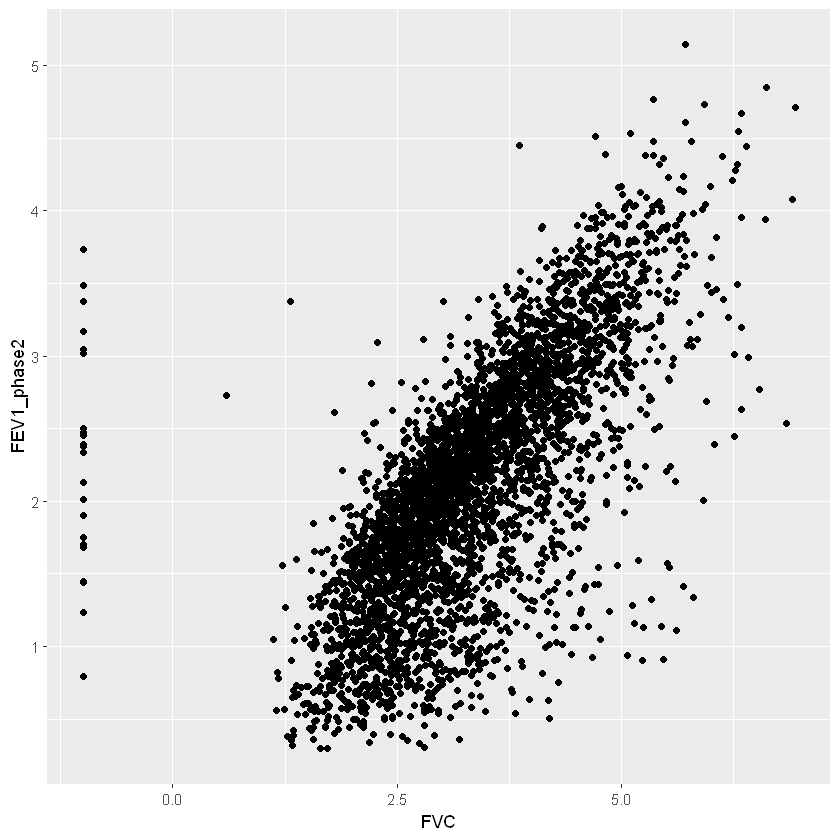


Call:
lm(formula = FEV1_phase2 ~ FEV1 + FVC + height_cm, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7178 -0.1888 -0.0140  0.1623  3.7346 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.5042146  0.1157301  -13.00   <2e-16 ***
FEV1         1.0287622  0.0126502   81.32   <2e-16 ***
FVC         -0.2519033  0.0120566  -20.89   <2e-16 ***
height_cm    0.0122794  0.0007569   16.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3575 on 3996 degrees of freedom
Multiple R-squared:  0.8129,	Adjusted R-squared:  0.8128 
F-statistic:  5788 on 3 and 3996 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-1.73111017,-1.27731900
FEV1,1.00396079,1.05356365
FVC,-0.27554107,-0.22826561
height_cm,0.01079551,0.01376338


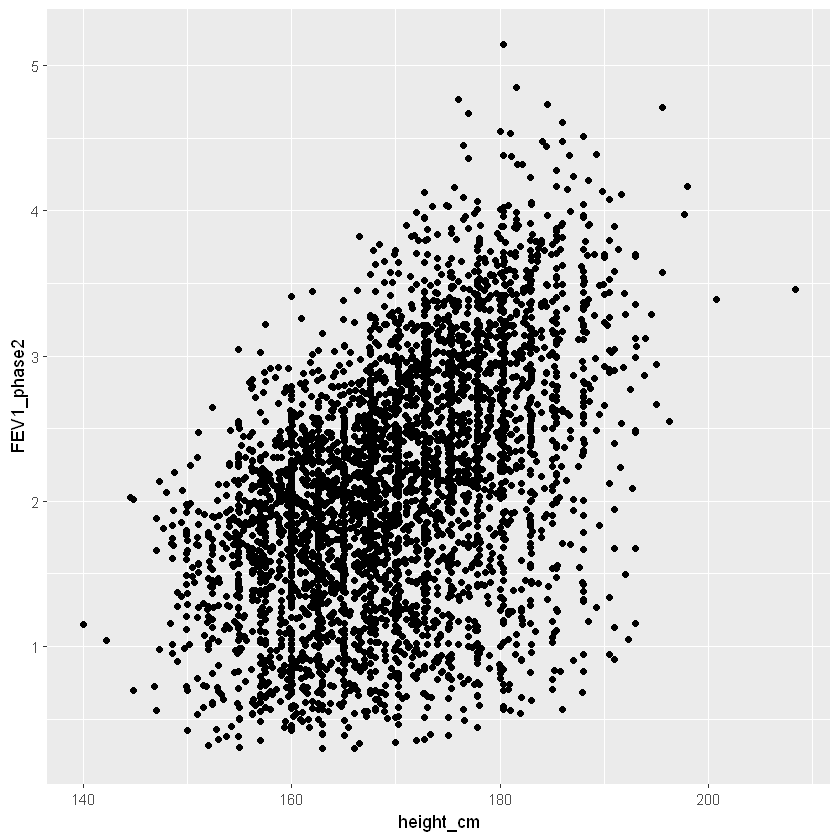

In [9]:
# 1.)
# I chose FVC and height_cm as my 2nd and 3rd vars to explain FEV1_phase2 according to the correlations above.
# Scatter of FEV1_phase2 vs FVC
ggplot(data = dat1, mapping = aes(y = FEV1_phase2, x = FVC)) +
  geom_point()

# Scatter of FEV1_phase2 vs height_cm
ggplot(data = dat1, mapping = aes(y = FEV1_phase2, x = height_cm)) +
  geom_point()

# 2.)
# Add vars to model_1.
model_2 = lm(FEV1_phase2 ~ FEV1 + FVC + height_cm, dat1)
summary(model_2)

# 3.)
# Show 95% confidence interval for vars.
confint(model_2)

1.) FEV1_phase2 vs FVC shows a strong positive linear correlation. FEV1_phase2 vs height_cm shows a moderate positive linear correlation.

3.) After adding the variables FVC and height_cm, the slope estimates confidence intervals are as follows. FEV1: (1.00, 1.05), FVC: (-0.276, -0.228), and height_cm: (0.011, 0.0138). All these intervals do not contain zero meaning that they are statistically significantly correlated with FEV1_phase2 at the 0.05 level. Additionally the R^2 increased from 0.7897 to 0.8129.

<br>

---

<br>






####<font color=red>Task 8</font> (5 points)

1. Using your regression model with three variables from Task 7, predict the `FEV1_phase2`.
2. Calculate the root mean squared error. Is this error large or small? Explain your answer.


```
# Hint
y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(...))

# root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
```




In [10]:
# 1.)
# Create df of true y and predicted y from model_2.
model_analysis = data.frame(y = dat1$FEV1_phase2, y_predicted = predict(model_2))
head(model_analysis)

# 2.)
# Calc Root mean squared error.
mse = mean((model_analysis$y - model_analysis$y_predicted)^2)
mse
rmse = sqrt(mse)
rmse

,y,y_predicted
,<dbl>,<dbl>
1,2.622,2.5057907
3,1.087,1.0423921
4,2.002,1.7624132
5,2.178,2.3061350
6,0.924,1.0370631
7,0.596,0.6290515


[1] 0.1276737

[1] 0.3573146

2.) The rmse calculated was 0.357 which is less than half of the sd of FEV1_phase2 which was 0.826. I would consider this root mean squared error to be small relative to the range and sd of the response variable.

<br>

---

<br>






####<font color=red>Task 9</font> Group Task (15 points)

1. Using the statistical/machine learning concepts from class, build a model (regression or random forest) that best predicts the `FEV1_phase2` variable in the `dat2` dataframe.
2. Submit your predictions as a csv file in the format presented in the `copd_predictions.csv` file on Canvas.

<br>
<br>

* The group with the lowest prediction error will receive 10 points extra credit on their overall project grade.
* The group with the second lowest prediction error will receive 5 points extra credit on their overall project grade.
* The group with the third lowest prediction error will receive 2 points extra credit on their overall project grade.

In [11]:
# Create test train sets.
# nvm

# 1.)
# Creating Linear Regression using steps by AIC Akaike's Information Criterion.
mod0 = lm(FEV1_phase2 ~ 1, dat1)
modstep = step(mod0, scope = .~. + visit_age + gender + race + height_cm + weight_kg + sysBP + diasBP + hr + O2_hours_day + bmi + asthma + hay_fever + bronchitis_attack + pneumonia + chronic_bronchitis + emphysema + copd + sleep_apnea + SmokStartAge + CigPerDaySmokAvg + Duration_Smoking + smoking_status + total_lung_capacity + pct_emphysema + functional_residual_capacity + pct_gastrapping + insp_meanatt + exp_meanatt + FEV1_FVC_ratio + FEV1 + FVC)

Start:  AIC=-1526.15
FEV1_phase2 ~ 1

                               Df Sum of Sq     RSS     AIC
+ FEV1                          1   2155.79  574.08 -7761.1
+ FVC                           1   1368.15 1361.73 -4306.1
+ copd                          2    649.65 2080.23 -2609.3
+ height_cm                     1    596.02 2133.86 -2509.5
+ FEV1_FVC_ratio                1    538.91 2190.97 -2403.8
+ emphysema                     2    453.00 2276.87 -2248.0
+ gender                        1    415.73 2314.14 -2185.0
+ pct_gastrapping               1    376.27 2353.60 -2117.4
+ pct_emphysema                 1    326.66 2403.21 -2033.9
+ visit_age                     1    264.73 2465.15 -1932.2
+ O2_hours_day                  1    209.12 2520.76 -1842.9
+ Duration_Smoking              1    203.11 2526.76 -1833.4
+ chronic_bronchitis            2    191.54 2538.34 -1813.1
+ asthma                        2    161.50 2568.38 -1766.1
+ bronchitis_attack             2    152.17 2577.71 -1751.6
+ 

In [12]:
summary(modstep)
# Create df of true y and predicted y from model_2.
model_analysis_2 = data.frame(y = dat1$FEV1_phase2, y_predicted = predict(modstep))
head(model_analysis)

# 2.)
# Calc Root mean squared error.
mse = mean((model_analysis_2$y - model_analysis_2$y_predicted)^2)
mse
rmse = sqrt(mse)
rmse


Call:
lm(formula = FEV1_phase2 ~ FEV1 + FEV1_FVC_ratio + FVC + height_cm + 
    copd + pct_gastrapping + exp_meanatt + smoking_status + visit_age + 
    total_lung_capacity + gender + hr + race + CigPerDaySmokAvg + 
    pneumonia, data = dat1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75954 -0.16268 -0.00268  0.15970  2.49062 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  9.653e-01  1.380e-01   6.993 3.13e-12 ***
FEV1                         1.370e+00  1.968e-02  69.603  < 2e-16 ***
FEV1_FVC_ratio              -1.612e+00  4.279e-02 -37.676  < 2e-16 ***
FVC                         -4.186e-01  1.339e-02 -31.259  < 2e-16 ***
height_cm                    4.620e-03  7.682e-04   6.014 1.98e-09 ***
copdunknown                 -1.933e-02  1.883e-02  -1.027 0.304593    
copdYes                     -7.607e-02  1.342e-02  -5.668 1.55e-08 ***
pct_gastrapping             -4.667e-03  4.683e-04  -9.965  < 2e-16 *

,y,y_predicted
,<dbl>,<dbl>
1,2.622,2.5057907
3,1.087,1.0423921
4,2.002,1.7624132
5,2.178,2.3061350
6,0.924,1.0370631
7,0.596,0.6290515


[1] 0.08513186

[1] 0.2917736

In [13]:
FEV1_phase2_predictions <- predict(modstep, dat2)
preds <- data.frame(sid = dat2$sid, FEV1_phase2_predictions)
head(preds)
dim(preds)
write.csv(preds, 'copd_predictions.csv')

,sid,FEV1_phase2_predictions
,<chr>,<dbl>
1,10006S,1.173270
2,10031R,1.976849
3,10032T,1.327314
4,10052Z,1.476226
5,10055F,2.714539
6,10057J,1.910481


[1] 1747    2

<br>

---

<br>






####<font color=red>Task 10</font> (20 points)

Write a 500-750 word abstract describing your analysis. Note this is a formal writeup and should be written with proper spelling and grammar. Imagine you are submitting this abstract to a conference for review. The writeup should include the following:

* Introduction to the topic of COPD and motivation for the analysis
* Description of the purpose of the study/report (what you were interested in finding)
* Briefly describe the data used to perform the analysis
* Description of the variables and methods used to conduct the analysis (data visualization, t-tests, regression, random forests, etc.)
* Description of the major results (estimates, significance, etc.)
* Major conclusions from the analysis in the context of the original application.



Dylan Watson<br>
Professor Hasenstab<br>
STAT 200: Introduction to Data Science with R<br>
3 May 2024<br>
Predicting Future Lung Forced Expiratory Volume with Methods of Statistical Modeling<br>
	In this study we were provided with a .csv file containing 35 variables of health data for over 5747 patients. These variables include information such as age, gender, race, height, weight, systolic and diastolic blood pressure, lung capacity, expiratory volume, and many other lung related factors. However, 1747 patients did not have data on a variable name FEV1_phase2 which is expiratory volume at 5 years follow up. It is our goal in this study to use statistical modeling to create accurate predictions for this expiratory volume at follow up given the other patient health metrics.<br>
	We began by exploring the distributions of certain numeric variables of our dataset such as our response variable of interest FEV1_phase2 among others. We concluded that FEV1_phase2 follows an approximately normal distribution with a mean of 2.12 liters volume and standard deviation of 0.826 liters.<br>
	Proceeding, we decided to explore the relationships between FEV1_phase2 and other categorical variables. We found that forced expiratory volume at follow up was strongly correlated with smoking status and gender and not significantly correlated by race.<br>
	Next, we looked into correlations between FEV1_phase1 and other numeric variables. These included FEV1, FVC, and height. There was found to be strong positive linear correlations between FEV1_phase2 and FEV1 as well as FVC with R values of 0.8887 and 0.7079 respectively. Many other variables were found to have some correlations but not nearly as significant as those two.<br>
	The next step came the phase of modeling. We decided to begin with simple linear regressions. First, we modeled FEV1_phase2 vs FVC and received an R^2 of 0.7897. This model was a strong start for its simplicity, but we decided to add in some other predictors to try to improve our model’s accuracy. With the addition of FVC and height_cm in a multiple linear regression model we increased the R^2 to 0.8129. This second model produced a RMSE of 0.357.<br>
	For the final stage of modeling, we went with using the step() function which considers the Akaike Information Criterion when adding variables at each step. This function will start with a base regression and test adding each variable to the base to identify which variable improves the accuracy of the regression most without introducing too much complexity. The model will step forward through this process until no variable is left which results in a lower AIC score. In other words, until the complexity added outweighs the improvement in accuracy. In the end of this process, we got a regression which includes the following variables: FEV1, FEV1_FVC_ratio, FVC, height_cm, copd, pct_gastrapping, exp_meanatt, smoking_status, visit_age, total_lung_capacity, gender, hr, race, CigPerDaySmokAvg, and pneumonia. This final model has an R^2 of 0.8753 and RMSE of 0.292 which are solid improvements on the previous model.<br>
	Finally, we can use the predict() function to use the model we trained on the 4000 patients with FEV1_phase2 data to predict values for the remaining 1747 patients.<br>
